In [118]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
#from catboost import CatBoostClassifier
import plotly.express as px
import random
from sklearn.model_selection import GridSearchCV
random.seed(0)
from tensorflow import keras
from tensorflow.keras.models import Model
from keras.layers import Activation, Dense
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv  
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import plotly.express as px
import seaborn as sb
from keras import Sequential
from sklearn import metrics
import keras
from keras import Sequential
from keras.layers import Dense, Input
from keras.losses import MSE
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [119]:
data = pd.read_csv('DataFinalDeCVV.csv',on_bad_lines='skip',sep=';')
df=data.drop(['Unnamed: 0'],axis=1)


In [120]:
df

,additionalInfo,connectionDegree,job,location,speciality,category,skills,date,experience,disponibilite
0,Entreprise actuelleÂ Â : Responsable marketing...,2nd,ingÃ©nieur en technologie Web et multimÃ©dia /...,La Marsa,Marketing,People,"HTML,VPN, English,C, Database,Java,SEMrush,Sym...",2012-12-16,122,['en ligne']
1,"Sujets de prÃ©dilectionÂ : #creativity, #innov...",2nd,Marketing - oGX Specialist and Data Team Leade...,DÃ©lÃ©gation Nabeul,Marketing,People,"Git and GitHub,HubSpot,JAVA-FX, Spring boot,PH...",2016-12-13,74,NaN
2,Entreprise actuelleÂ Â : Marketing Officer che...,3rd,Marketing Officer at Avis Tunisia,Tunisie,Marketing,People,"Angular,HubSpot, Database,Android, React,C,Ho...",2015-12-26,86,['presentiel']
3,Entreprise prÃ©cÃ©denteÂ Â : Senior Research E...,2nd,MARKETING PRACTICE MANAGER chez Value,Tunisie,Marketing,People,"PHP, Swagger,Symfony,C#,Java,Git and GitHub,DN...",2017-12-25,62,['presentiel']
4,Entreprise actuelleÂ Â : Content Marketing Spe...,3rd,Content Marketing specialist,La Marsa,Marketing,People,"Spring boot,C#,mySQL,Adobe Creative Suite,C++...",2016-12-17,74,['presentiel']
...,...,...,...,...,...,...,...,...,...,...
5576,NaN,3rd,technicien supÃ©rieur en science informatique ...,Tunis,gÃ©nie logiciel,People,"mySQL,Gestion de base de donnÃ©es, Database, M...",2022-04-19,10,['presentiel']
5577,NaN,3rd,Master en gÃ©nie logiciel chez ISIMM |,"Gouvernorat Tunis, Tunisie",gÃ©nie logiciel,People,"JAVA-FX, UBUNTO , React,Communication,. NET, D...",2019-11-18,39,['en ligne']
5578,RÃ©sumÃ©Â : Titulaire dâ€™un diplÃ´me technici...,3rd,Ã‰tudiant en gÃ©nie logiciel et systÃ©me d'inf...,"Gouvernorat La Manouba, Tunisie",gÃ©nie logiciel,People,"SQL,Communication,Gestion de base de donnÃ©es...",2019-05-09,45,NaN
5579,NaN,3rd,Err:509,Tunisie,gÃ©nie logiciel,People,"C++,DNS,Routage, Visual Studio,C#,Android",2016-01-27,85,['en ligne']


In [121]:
df.shape

(5581, 10)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5581 entries, 0 to 5580
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   additionalInfo    4624 non-null   object
 1   connectionDegree  5579 non-null   object
 2   job               5576 non-null   object
 3   location          5563 non-null   object
 4   speciality        5577 non-null   object
 5   category          5577 non-null   object
 6   skills            5577 non-null   object
 7   date              5581 non-null   object
 8   experience        5581 non-null   int64 
 9   disponibilite     5567 non-null   object
dtypes: int64(1), object(9)
memory usage: 436.1+ KB


In [123]:
df.isna().sum()

additionalInfo      957
connectionDegree      2
job                   5
location             18
speciality            4
category              4
skills                4
date                  0
experience            0
disponibilite        14
dtype: int64

In [124]:
data.dtypes.value_counts()

object    9
int64     2
dtype: int64

<AxesSubplot: >

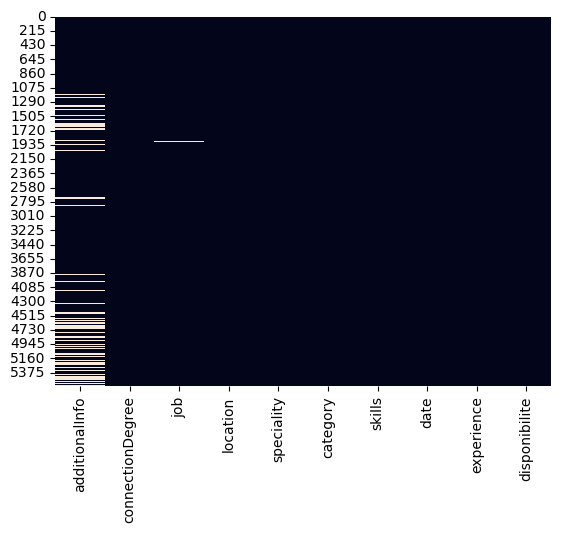

In [125]:
sb.heatmap(df.isna(), cbar=False)

In [126]:
data.dtypes

Unnamed: 0           int64
additionalInfo      object
connectionDegree    object
job                 object
location            object
speciality          object
category            object
skills              object
date                object
experience           int64
disponibilite       object
dtype: object

<AxesSubplot: xlabel='experience', ylabel='count'>

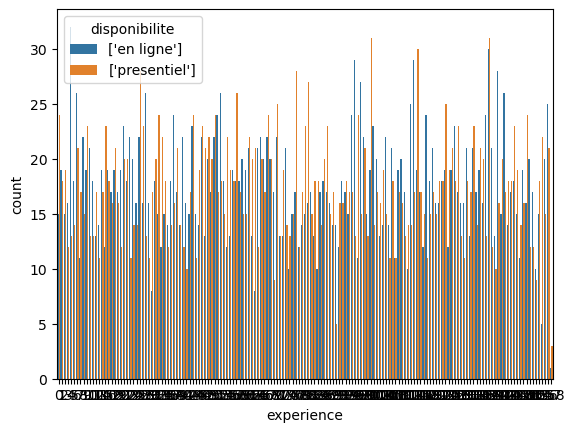

In [127]:
sb.countplot(x ='experience', hue = 'disponibilite', data = df)

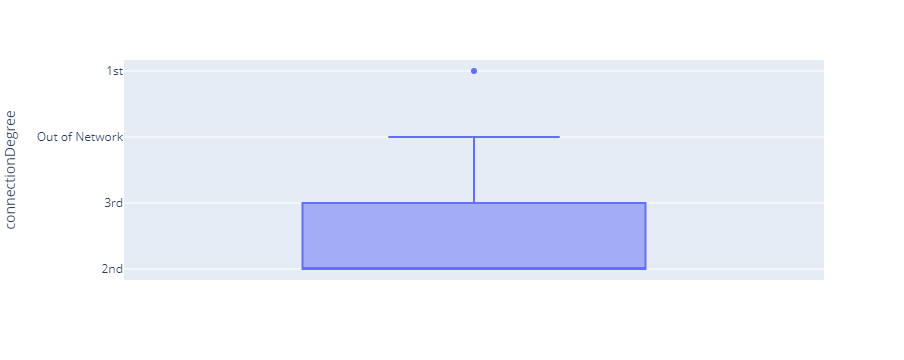

In [128]:
fig = px.box(df, y="connectionDegree")
fig.show()

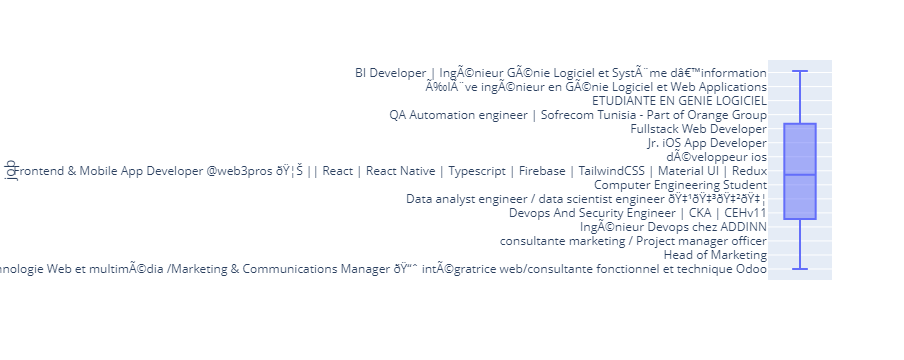

In [129]:
fig = px.box(df, y="job")
fig.show()

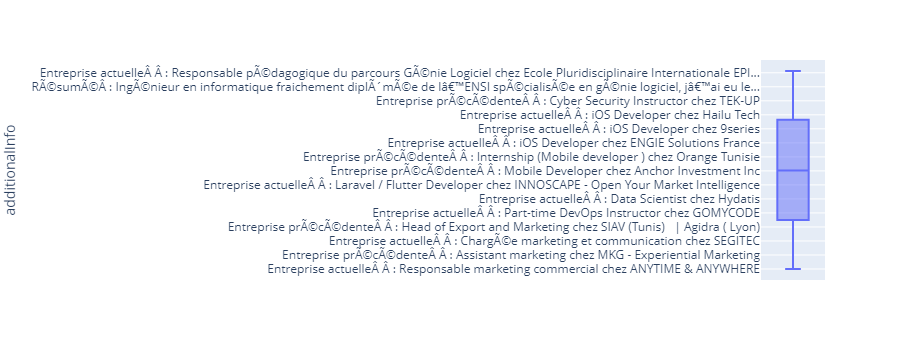

In [130]:
fig = px.box(df, y="additionalInfo")
fig.show()

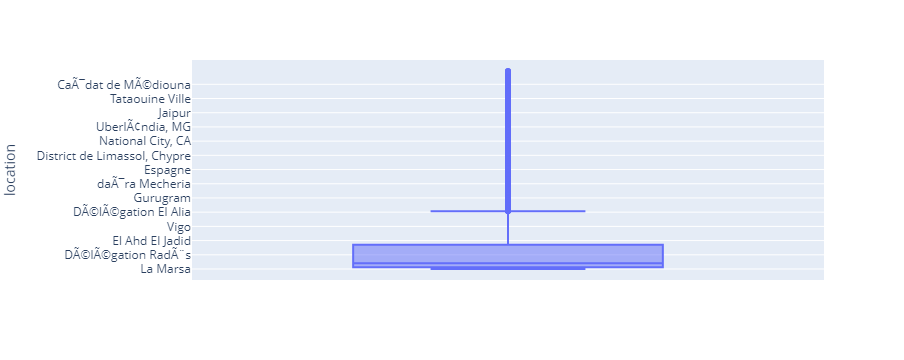

In [131]:
fig = px.box(df, y="location")
fig.show()

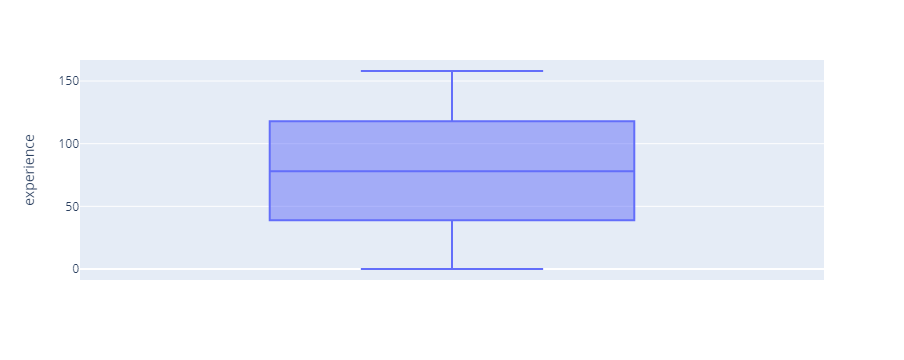

In [132]:
fig = px.box(df, y="experience")
fig.show()

In [133]:
#dx=df[~df['additionalInfo'].isna()]


In [159]:
df.isna().sum()

additionalInfo      957
connectionDegree      2
job                   5
location             18
speciality            4
category              4
skills                4
date                  0
experience            0
disponibilite        14
dtype: int64

In [135]:
# dxx=dx[~dx['disponibilite'].isna()]

In [136]:
# dxxx=dxx[~dxx['job'].isna()]

In [137]:
# dxxx1=dxxx[~dxxx['connectionDegree'].isna()]

In [138]:
# dxxx3=dxxx1[~dxxx1['skills'].isna()]

In [139]:
# dxxx4=dxxx3[~dxxx3['speciality'].isna()]

In [140]:
# dxxx5=dxxx4[~dxxx4['category'].isna()]

In [141]:
# dxxx6=dxxx5[~dxxx5['location'].isna()]

In [142]:
# dxxx7=dxxx6[~dxxx6['experience'].isna()]

In [143]:
# dxxx8=dxxx7[~dxxx7['date'].isna()]

In [144]:
# data=dxxx8

In [145]:
# data

In [160]:
df.head()

,additionalInfo,connectionDegree,job,location,speciality,category,skills,date,experience,disponibilite
0,Entreprise actuelleÂ Â : Responsable marketing...,2nd,ingÃ©nieur en technologie Web et multimÃ©dia /...,La Marsa,Marketing,People,"HTML,VPN, English,C, Database,Java,SEMrush,Sym...",2012-12-16,122,['en ligne']
1,"Sujets de prÃ©dilectionÂ : #creativity, #innov...",2nd,Marketing - oGX Specialist and Data Team Leade...,DÃ©lÃ©gation Nabeul,Marketing,People,"Git and GitHub,HubSpot,JAVA-FX, Spring boot,PH...",2016-12-13,74,NaN
2,Entreprise actuelleÂ Â : Marketing Officer che...,3rd,Marketing Officer at Avis Tunisia,Tunisie,Marketing,People,"Angular,HubSpot, Database,Android, React,C,Ho...",2015-12-26,86,['presentiel']
3,Entreprise prÃ©cÃ©denteÂ Â : Senior Research E...,2nd,MARKETING PRACTICE MANAGER chez Value,Tunisie,Marketing,People,"PHP, Swagger,Symfony,C#,Java,Git and GitHub,DN...",2017-12-25,62,['presentiel']
4,Entreprise actuelleÂ Â : Content Marketing Spe...,3rd,Content Marketing specialist,La Marsa,Marketing,People,"Spring boot,C#,mySQL,Adobe Creative Suite,C++...",2016-12-17,74,['presentiel']


In [161]:
le = LabelEncoder()
df['additionalInfo'] = le.fit_transform(df['additionalInfo'].astype(str))

In [162]:
le = LabelEncoder()
df['connectionDegree'] = le.fit_transform(df['connectionDegree'].astype(str))


In [163]:
le = LabelEncoder()
df['job'] = le.fit_transform(df['job'].astype(str))


In [165]:
le = LabelEncoder()
df['location'] = le.fit_transform(df['location'].astype(str))


In [166]:
le = LabelEncoder()
df['speciality'] = le.fit_transform(df['speciality'].astype(str))


In [167]:
le = LabelEncoder()
df['category'] = le.fit_transform(df['category'].astype(str))


In [168]:
le = LabelEncoder()
df['skills'] = le.fit_transform(df['skills'].astype(str))


In [169]:
le = LabelEncoder()
df['disponibilite'] = le.fit_transform(df['disponibilite'].astype(str))


In [170]:
le = LabelEncoder()
df['date'] = le.fit_transform(df['date'].astype(str))

In [172]:
df

,additionalInfo,connectionDegree,job,location,speciality,category,skills,date,experience,disponibilite
0,1739,1,4039,361,1,0,3682,743,122,0
1,4066,1,2314,199,1,0,3501,1720,74,2
2,1337,2,2416,612,1,0,113,1485,86,1
3,3277,1,2259,612,1,0,4374,1971,62,1
4,419,2,533,361,1,0,1501,1724,74,1
...,...,...,...,...,...,...,...,...,...,...
5576,4295,2,4118,611,7,0,5526,3062,10,1
5577,4295,2,2513,291,7,0,4028,2453,39,0
5578,3943,2,4238,279,7,0,1365,2331,45,2
5579,4295,2,1325,612,7,0,2767,1509,85,0


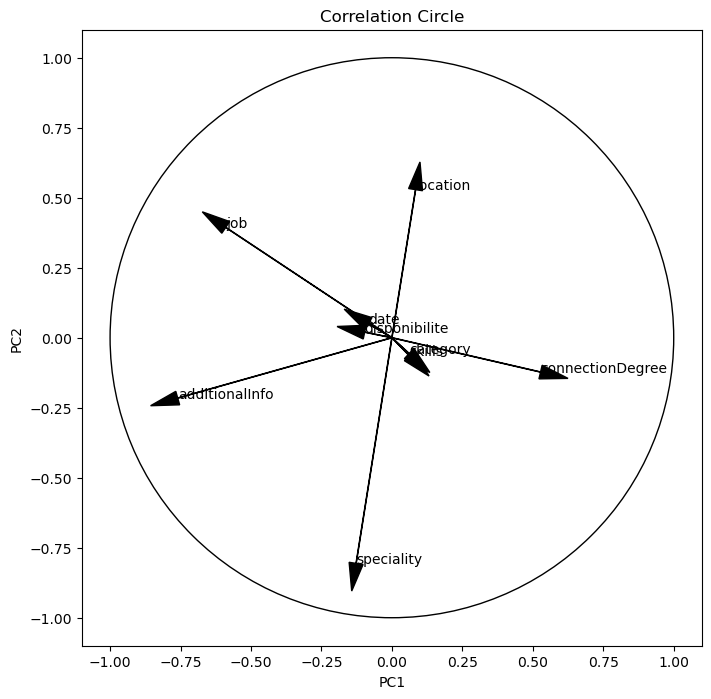

In [176]:
# Choose the variables to include in the correlation circle
variables = ['additionalInfo', 'connectionDegree','location', 'job','speciality', 'date'
             , 'category', 'skills','disponibilite']

# Standardize the data
X = df[variables].values
X = StandardScaler().fit_transform(X)

# Perform principal component analysis (PCA) on the standardized data
pca = PCA()
principal_components = pca.fit_transform(X)

# Calculate the correlations between the principal components and the original variables
correlations = np.corrcoef(principal_components.T, X.T)[:len(variables), len(variables):]

# Create the correlation circle plot
fig, ax = plt.subplots(figsize=(8, 8))
circle = plt.Circle((0, 0), radius=1, color='black', fill=False)
ax.add_artist(circle)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.title('Correlation Circle')
plt.xlabel('PC1')
plt.ylabel('PC2')
for i, variable in enumerate(variables):
    ax.annotate(variable, (correlations[0, i], correlations[1, i]))
    ax.arrow(0, 0, correlations[0, i], correlations[1, i], head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.show()


In [177]:
#https://www.soft-concept.com/surveymag/comment-lire-une-acp.html#:~:text=Elle%20prend%20des%20valeurs%20entre,pas%20%C3%AAtre%20effectu%C3%A9e%20avec%20confiance.

<AxesSubplot: >

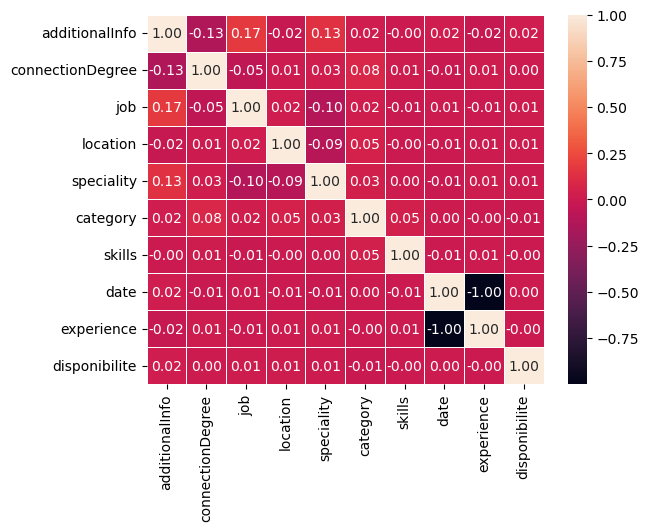

In [178]:
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=.5)

In [179]:
df['disponibilite'].value_counts()

0    2806
1    2761
2      14
Name: disponibilite, dtype: int64

In [180]:
ind_col = [col for col in df.columns if col != 'disponibilite']
dep_col = 'disponibilite'

X = df[ind_col]
y = df[dep_col]

In [181]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [182]:
y_train.value_counts()

0    2098
1    2076
2      11
Name: disponibilite, dtype: int64

In [183]:
len(X_train), len(X_test), len(y_train), len(y_test)

(4185, 1396, 4185, 1396)

In [184]:
classes = ["en ligne", "presentiel"]

In [185]:
X_train

,additionalInfo,connectionDegree,job,location,speciality,category,skills,date,experience
3559,838,1,1210,248,0,0,5354,2084,57
4832,3631,1,3398,291,7,0,4023,159,149
668,418,2,527,187,1,0,5463,6,157
4594,4295,1,2134,291,7,0,3513,47,155
4441,4295,3,3582,270,10,0,1652,1152,102
...,...,...,...,...,...,...,...,...,...
4931,4295,1,1989,391,7,0,1905,2623,31
3264,3463,1,3901,575,0,0,1388,589,130
1653,4295,1,4194,291,2,0,1892,2405,42
2607,916,2,1435,395,8,0,996,757,122


In [186]:
X_train.shape

(4185, 9)

In [187]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
class Model():
    def __init__(self, model, model_name, X_train, y_train, X_test, y_test, fitted = False):
        print(f'******************~ {model_name} ~**********************\n')
        super().__init__()
        self.model=model
        if fitted == False:
          self.model.fit(X_train, y_train)
        self.model_name = model_name
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.y_pred_train = self.model.predict(self.X_train)
        self.y_pred = self.model.predict(self.X_test)
    def accuracy(self):
        score = accuracy_score(self.y_test, self.y_pred)
        return score
    def summary(self):
        print(f"Training Accuracy of {self.model_name} is {accuracy_score(y_train, self.y_pred_train)}")
        print(f"Test cross-validation Accuracy of {self.model_name} is {self.accuracy()} \n")
        print(f"Classification Report :- \n {classification_report(self.y_test, self.y_pred)}")
    def confusion_matrix(self):
        print(f"Confusion Matrix :- \n")
        cm = confusion_matrix(self.y_test, self.y_pred)
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classes)
        fig, ax = plt.subplots(figsize=(10,10))
        cm_display.plot(ax=ax, cmap=plt.cm.Blues)

C:\Users\SMSB\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=10.

C:\Users\SMSB\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\SMSB\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become 

Text(0, 0.5, 'Score')

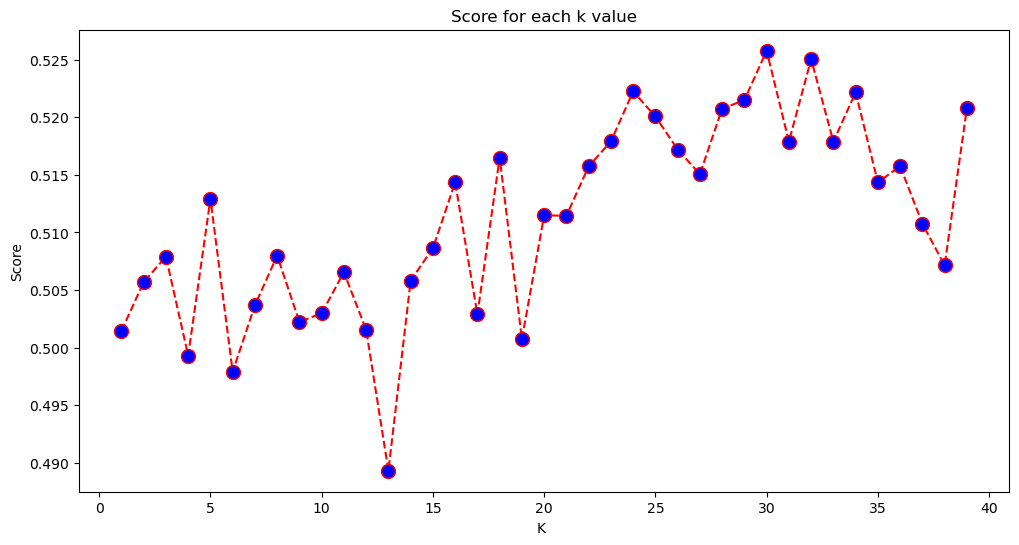

In [188]:
score = []
# Calculate score for k between 1 and 40 

for i in range(1, 40):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_train, y_train)
    scores = cross_val_score(
    knn, X_test, y_test, cv=10, scoring='accuracy')
    score.append(np.mean(scores))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), score, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Score for each k value')
plt.xlabel('K ')
plt.ylabel('Score')

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# md = Model(DecisionTreeClassifier(),"DecisionTreeClassifier",X_train,y_train,X_test,y_test)
# dtc_acc = md.accuracy()
# md.summary()
# md.confusion_matrix()

In [ ]:
# #KNN
# md = Model(KNeighborsClassifier(2,metric='manhattan'),"KNN",X_train,y_train,X_test,y_test)
# knn_acc = md.accuracy()
# md.summary()
# md.confusion_matrix()

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline

# reg = LogisticRegression()
# pipe = make_pipeline(StandardScaler(), LogisticRegression())

# md = Model(pipe,"LogisticRegression",X_train,y_train,X_test,y_test)
# reg_acc = md.accuracy
# md.summary()
# md.confusion_matrix()

In [196]:

imputer = KNNImputer(n_neighbors=13)
data_imputed = imputer.fit_transform(df)

In [197]:
data_imputed = pd.DataFrame(data_imputed, columns=df.columns)

In [198]:
data_imputed.to_csv('imputed_data.csv', index=False)

In [199]:
dataimputed = pd.read_csv('imputed_data.csv',on_bad_lines='skip',sep=',')

In [200]:
dataimputed.shape

(5581, 10)

In [201]:
dataimputed.head()

,additionalInfo,connectionDegree,job,location,speciality,category,skills,date,experience,disponibilite
0,1739.0,1.0,4039.0,361.0,1.0,0.0,3682.0,743.0,122.0,0.0
1,4066.0,1.0,2314.0,199.0,1.0,0.0,3501.0,1720.0,74.0,2.0
2,1337.0,2.0,2416.0,612.0,1.0,0.0,113.0,1485.0,86.0,1.0
3,3277.0,1.0,2259.0,612.0,1.0,0.0,4374.0,1971.0,62.0,1.0
4,419.0,2.0,533.0,361.0,1.0,0.0,1501.0,1724.0,74.0,1.0


In [204]:
dataimputed.isna().sum()

additionalInfo      0
connectionDegree    0
job                 0
location            0
speciality          0
category            0
skills              0
date                0
experience          0
disponibilite       0
dtype: int64

In [ ]:
# #Problème au niveau du modèle Knn sans imputation


# import numpy as np
# from sklearn.impute import KNNImputer
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.preprocessing import LabelEncoder

# # Exemple de données avec des valeurs manquantes
# X = df['additionalInfo']

# # Encoder les chaînes de caractères en nombres
# le = LabelEncoder()
# X_encoded = np.apply_along_axis(le.fit_transform, 0, X)

# # Imputer les valeurs manquantes avec KNN
# imputer = KNNImputer(n_neighbors=3)
# X_imputed_encoded = imputer.fit_transform(X_encoded)

# # Décoder les nombres en chaînes de caractères
# X_imputed = np.apply_along_axis(le.inverse_transform, 0, X_imputed_encoded)

# # Créer un modèle KNN avec k=3
# knn = KNeighborsClassifier(n_neighbors=3)

# # Exemple de labels de sortie
# #y = np.array(['mammifère', 'mammifère', 'oiseau', 'mammifère', 'mammifère', 'poisson'])

# # Encoder les labels en nombres
# y_encoded = data['additionalInfo']

# # Entraîner le modèle
# knn.fit(X_imputed_encoded, y_encoded)

# # Prédire la classe d'une nouvelle observation avec valeurs manquantes
# new_observation = np.array([np.nan, 'gris'])
# new_observation_encoded = le.transform(new_observation.reshape(1, -1))
# imputed_observation_encoded = imputer.transform(new_observation_encoded)
# predicted_class = knn.predict(imputed_observation_encoded)

# # Décoder la classe prédite
# predicted_class_decoded = le.inverse_transform(predicted_class)
# print(predicted_class_decoded) # Output : ['mammifère']

In [ ]:
# #modèle logistic Regression : mm problème
# import numpy as np
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# # Exemple de données
# X =  data['additionalInfo']
# y =  data['disponibilite']

# # Standardisation des données
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# # Séparation des données en ensembles d'entraînement et de test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Entraînement du modèle de régression logistique
# lr = LogisticRegression()
# lr.fit(X_train, y_train)

# # Prédiction sur l'ensemble de test
# y_pred = lr.predict(X_test)

# # Calcul de la précision du modèle
# accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
# print("Précision : ", accuracy)

In [ ]:
# #Code d'imputation :execution validée mais pas d'imputation 



# import pandas as pd
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import OneHotEncoder

# # Load dataset with missing values
# #df = pd.read_csv('DataFinalDeCVNA.csv.csv')
# data = pd.read_csv('DataFinalDeCVV.csv',on_bad_lines='skip',sep=';')
# df=data.drop(['Unnamed: 0'],axis=1)
# # Select columns with missing values
# missing_cols = df.columns[df.isnull().any()].tolist()

# # Create one-hot encoder object
# encoder = OneHotEncoder()

# # Encode categorical variables
# df_encoded = pd.DataFrame(encoder.fit_transform(df[missing_cols]).toarray(),
#                           columns=encoder.get_feature_names(missing_cols))

# # Create KNN imputer object with k=3
# imputer = KNNImputer(n_neighbors=3)

# # Fit and transform the dataset
# imputed_df = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)


In [ ]:
print(imputed_df)

In [ ]:
df

In [ ]:
y =data['disponibilite']

In [ ]:
y